## Predicting heart disease using machine learning

We are going to take a following approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [308]:
# import all the tools we need

# Regular Exploratory Data Analysis(EDA) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model for scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay


In [197]:
# load data
df = pd.read_csv('../dataset/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [198]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [199]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [201]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [202]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

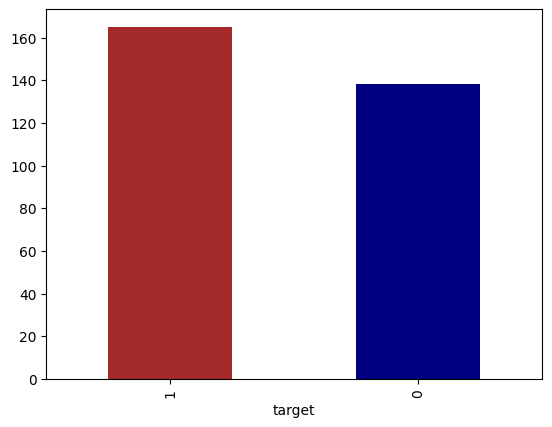

In [203]:
df['target'].value_counts().plot(kind="bar", color=["brown", "navy"]);

In [204]:
# check missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart disease frequency according to sex

In [205]:
df.sex.value_counts() # 1=male and 0=female

sex
1    207
0     96
Name: count, dtype: int64

In [206]:
# compare target column with sex column
pd.crosstab(df.target, df.sex, margins=True)

sex,0,1,All
target,,,
0,24,114,138
1,72,93,165
All,96,207,303


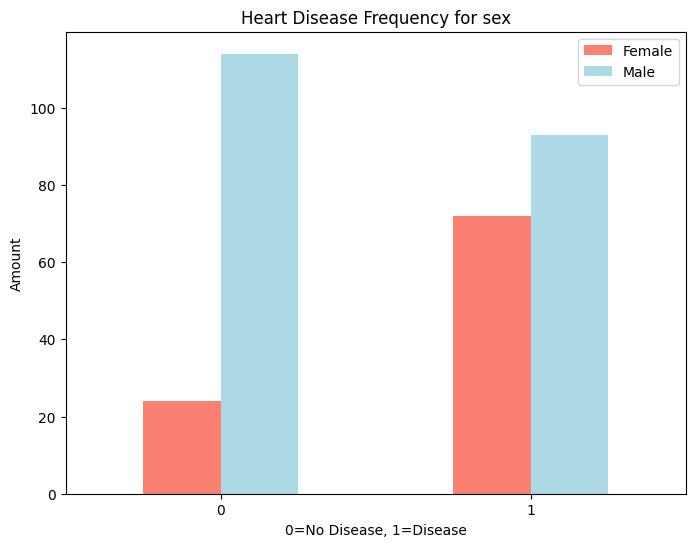

In [207]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(8, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]); #sex (1 = male; 0 = female)
plt.xticks(rotation=0);

# Heart disease frequency max heart rate vs age

In [208]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


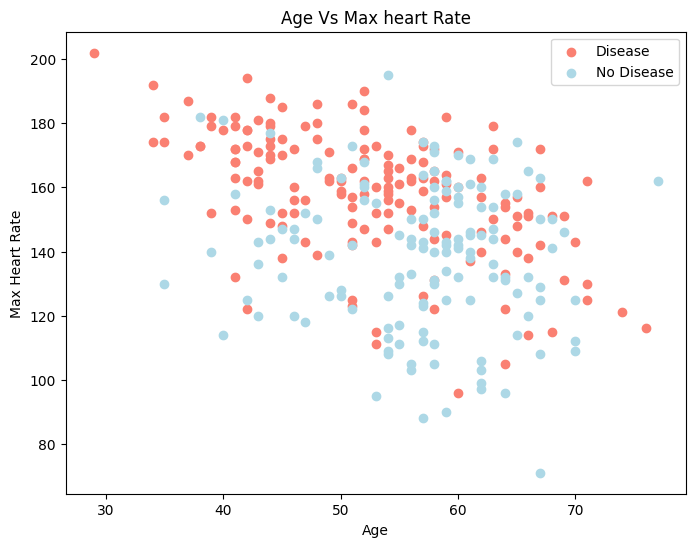

In [209]:
plt.figure(figsize=(8, 6))

# Scatter with positive example
plt.scatter(df.age[df.target == 1], 
           df.thalach[df.target == 1],
           c="salmon")

# Scatter with negetive example
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue")

plt.title("Age Vs Max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");
plt.legend(["Disease", "No Disease"]);



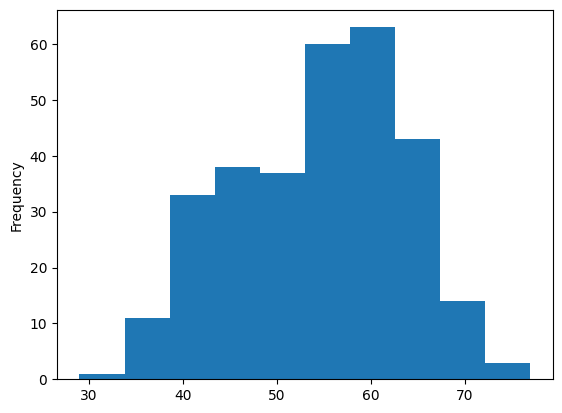

In [210]:
# check the distribution with the age column with histogram
df.age.plot.hist();

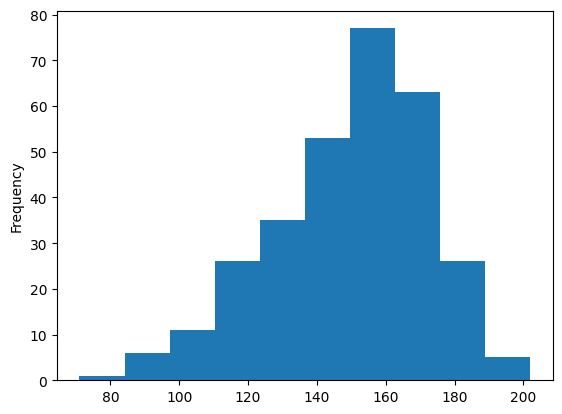

In [211]:
# check the distribution with the thalach column with histogram
df.thalach.plot.hist();

In [212]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


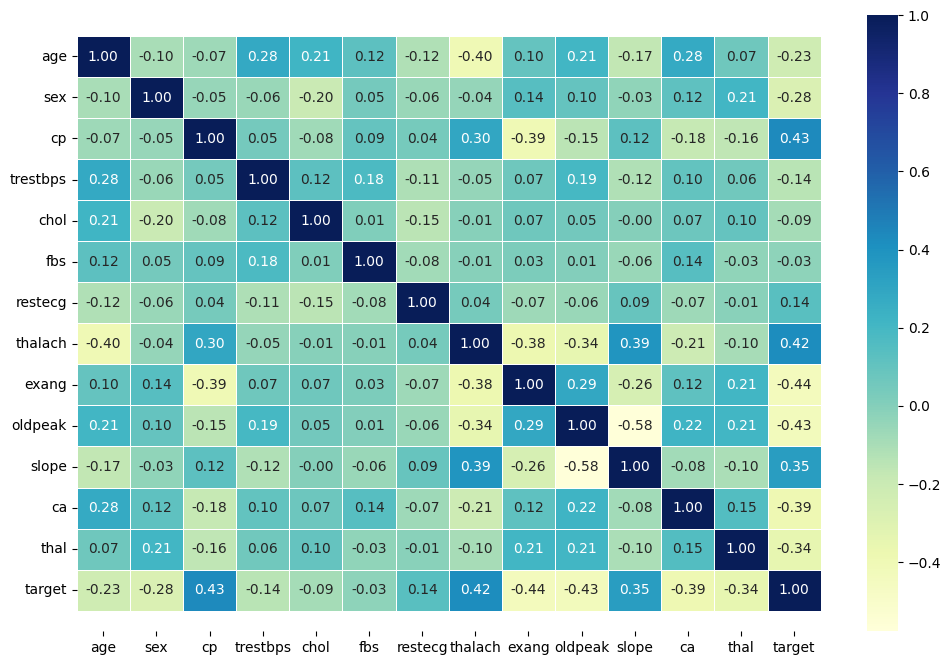

In [213]:
corr_matrix = df.corr()
ax, fig = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu" 
                )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5);

 # Modelling

 we are trying 3 model
 1. Logistic regression
 2. KNeighborsClassifier
 3. RandomForestClassifier

In [214]:
np.random.seed(42)
# Create X, y
X = df.drop("target", axis=1)
y = df["target"]

# Split Dataset into train test and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [274]:

# Model dict
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

def model_and_score(model, X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_score = {}
    for name, model in models.items():
        # fit model
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_score[name] = model.score(X_test, y_test)

    return model_score
    

    

In [275]:
model_score = model_and_score(models, X_train, X_test, y_train, y_test)
model_score

D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Naive Bayes': 0.8688524590163934}

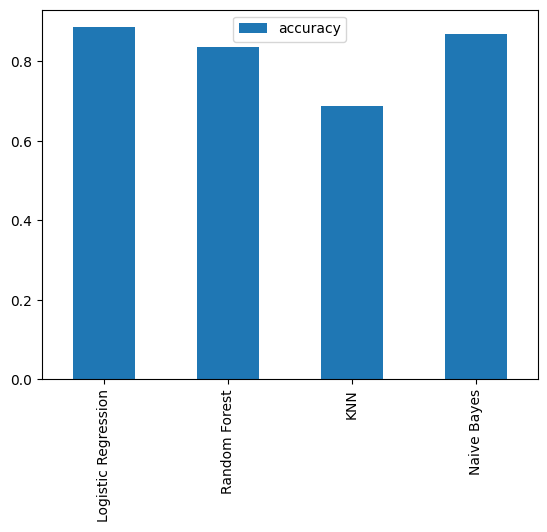

In [276]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot(kind="bar");

# hyperparameter Tuning

In [218]:
# Let's tune for knn
train_score = []
test_score = []

# create a list for different n_neighbors
neighbors = range(1, 30)

# setup knn
knn = KNeighborsClassifier()

# loop through for n_neighbors
for i in neighbors:
    
    # set different n_neighbors
    knn.set_params(n_neighbors=i)
    
    # fit the model
    knn.fit(X_train, y_train)

    # update the train score list
    train_score.append(knn.score(X_train, y_train))

    # update then test score list
    test_score.append(knn.score(X_test, y_test))

    

In [219]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818]

In [220]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361]

In [273]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Naive Bayes': 0.8688524590163934}

In [222]:
max(test_score)

0.7540983606557377

Maximun KNN test score 75.41%


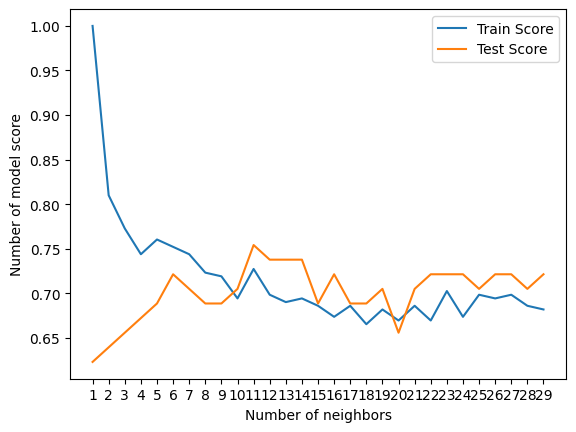

In [223]:
# let's visial the train score and test score
plt.plot(neighbors, train_score, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xticks(np.arange(1, 30, 1)) 
plt.xlabel("Number of neighbors")
plt.ylabel("Number of model score")
plt.legend()
print(f"Maximun KNN test score {max(test_score)*100:.2f}%");



## Set hyperparameter for LogisticRegression, Naive Bayes and RandomForestClassification

In [300]:
# set different hyperparameter for logisticRegression
log_reg_para_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga']
}

# set different hyperparameter for Naive Bayes 
nv_para_grid = {
    'var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-6]
}

# set different hyperparameters for RandomForestClassifier
random_para_grid = {
    'n_estimators': np.arange(100, 1000, 50),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}



## LogisticRegression with RrandomizedSearchCv

In [301]:
np.random.seed(42)
# Tuning For LogisticRegression with RrandomizedSearchCv
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_para_grid,
                               n_iter=10,
                               cv=5,
                               verbose=2)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................C=0.615848211066026, solver=saga; total time=   0.0s
[CV] END ...................C=0.615848211066026, solver=saga; total time=   0.0s
[CV] END ...................C=0.615848211066026, solver=saga; total time=   0.0s
[CV] END ...................C=0.615848211066026, solver=saga; total time=   0.0s
[CV] END ...................C=0.615848211066026, solver=saga; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END .................C=0.08858667904100823, solver=saga; total time=   0.0s
[CV] END .................C=0.08858667904100823,

D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-lear

[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s
[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s
[CV] END ..................C=29.763514416313132, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00183

D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\machine-lear

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'saga']},
                   verbose=2)

In [302]:
# logisticRegression best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [303]:
# logisticRegression score
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [304]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Naive Bayes': 0.8688524590163934}

## Naive Bayes with RrandomizedSearchCv

In [229]:
# Tuning For Naive Bayes with RrandomizedSearchCv
rs_nv_reg = RandomizedSearchCV(estimator=GaussianNB(),
                               param_distributions=nv_para_grid,
                               n_iter=10,
                               cv=5,
                               verbose=2)

rs_nv_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-12; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoo

D:\machine-learning\milestone-project_1\env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': [1e-12, 1e-10, 1e-09,
                                                          1e-08, 1e-06]},
                   verbose=2)

In [230]:
# naive bayes best params
rs_nv_reg.best_params_

{'var_smoothing': 1e-12}

In [255]:
# naive bayes score
rs_nv_reg.score(X_test, y_test)

0.8688524590163934

In [254]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Naive Bayes': 0.8688524590163934}

## RandomForestClassifier with RrandomizedSearchCv

In [232]:
# Tuning For RandomForestClassifier with RrandomizedSearchCv

rs_ran_reg = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=random_para_grid,
                                n_iter=10,
                                cv=5,
                                verbose=2
                               )

rs_ran_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=350; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=950; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=950; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [242]:
# random forest regression best params
rs_ran_reg.best_params_

{'n_estimators': 750,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

In [252]:
# random forest score
rs_ran_reg.score(X_test, y_test)

0.8688524590163934

In [293]:
# before score
model_score

{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Naive Bayes': 0.8688524590163934}

## Evaluting out tuned machine learning classifier
* ROC curve and AUC score
* Confusion Matrix
* Classification Reprot
* Accuracy
* Precision
* Recall
* F1-Score


In [306]:
# prediction the y
y_pred = rs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

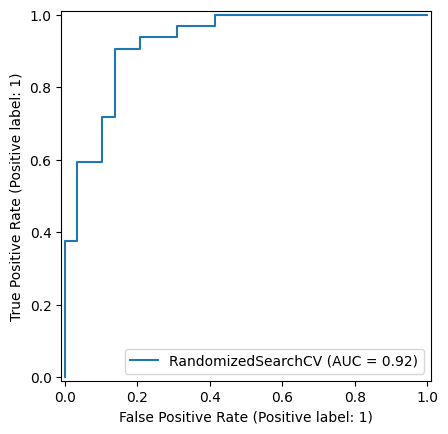

In [309]:
# Plot ROC curve and calculate accuracy metric
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test);

In [307]:
# confusion matirx
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 3, 29]], dtype=int64)

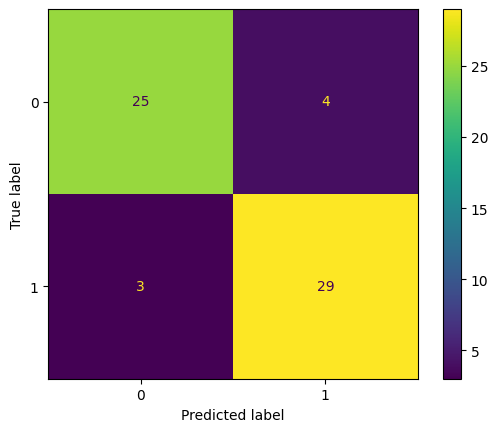

In [313]:
# display cofusion matrix
ConfusionMatrixDisplay.from_estimator(rs_log_reg, X_test, y_test);

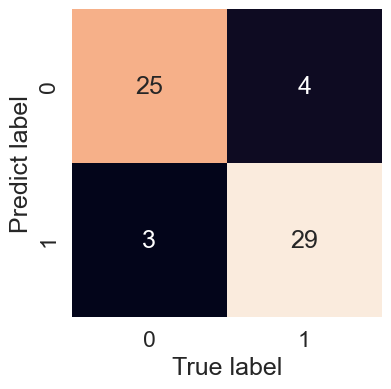

In [316]:
sns.set(font_scale=1.5)
# Confusion matrix display using sns
def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    cbar=False)

    plt.xlabel("True label")
    plt.ylabel("Predict label")

plot_conf_mat(y_test, y_pred)

In [336]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Evalution with scoring paramerter

In [320]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [322]:
# Evaluate metrix with  the cross validate
clf = LogisticRegression(C = 0.23357214690901212,
                        solver= 'liblinear')




In [355]:
# Cross Validate for accuracy
cv_acc = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc = np.mean(cv_acc)

In [356]:
print(f"Cross Validate Accuracy score for logistic regression {cv_acc*100:.2f}%")

Cross Validate Accuracy score for logistic regression 84.80%


In [357]:
# Cross Validate For Precision
cv_presicion = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")
cv_presicion = np.mean(cv_presicion)

In [358]:
print(f"Cross Validate Precision score for logistic regression {cv_presicion*100:.2f}%")

Cross Validate Precision score for logistic regression 82.16%


In [359]:
# Cross Validate for recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)

In [360]:
print(f"Cross Validate Recall score for logistic regression {cv_recall*100:.2f}%")

Cross Validate Recall score for logistic regression 92.73%


In [361]:
# Cross Validate for F1-Score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)

In [362]:
print(f"Cross Validate F1 score for logistic regression {cv_f1*100:.2f}%")

Cross Validate F1 score for logistic regression 87.05%


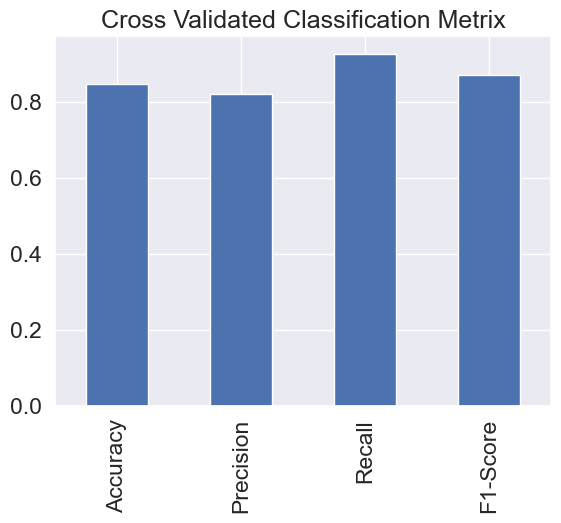

In [364]:
# visualization the cross validation metrics
acc_metrics = {
    "Accuracy": cv_acc,
    "Precision": cv_presicion,
    "Recall": cv_recall,
    "F1-Score": cv_f1
}
cv_metrics = pd.DataFrame(acc_metrics, index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Classification Metrix", legend=False);
